<a href="https://colab.research.google.com/github/rfaoktvian/ADIIP_Technical-Test/blob/main/NazlyRafaOktafianNuzqu_Programming_1_ADIIP2026A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, accuracy_score,
                             precision_score, recall_score, f1_score)
import warnings
warnings.filterwarnings('ignore')
!pip install xgboost lightgbm imbalanced-learn
import xgboost as xgb
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [150]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (3).csv
Saving train.csv to train (3).csv


In [151]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [152]:
train.shape

(24000, 25)

In [153]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      24000 non-null  int64
 1   X1      24000 non-null  int64
 2   X2      24000 non-null  int64
 3   X3      24000 non-null  int64
 4   X4      24000 non-null  int64
 5   X5      24000 non-null  int64
 6   X6      24000 non-null  int64
 7   X7      24000 non-null  int64
 8   X8      24000 non-null  int64
 9   X9      24000 non-null  int64
 10  X10     24000 non-null  int64
 11  X11     24000 non-null  int64
 12  X12     24000 non-null  int64
 13  X13     24000 non-null  int64
 14  X14     24000 non-null  int64
 15  X15     24000 non-null  int64
 16  X16     24000 non-null  int64
 17  X17     24000 non-null  int64
 18  X18     24000 non-null  int64
 19  X19     24000 non-null  int64
 20  X20     24000 non-null  int64
 21  X21     24000 non-null  int64
 22  X22     24000 non-null  int64
 23  X23     240

In [154]:
train.isnull().sum()

,0
ID,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0
X7,0
X8,0
X9,0


In [155]:
train['Y'].value_counts()
print(f"\nDefault Rate: {train['Y'].mean():.2%}")


Default Rate: 22.18%


In [156]:
train.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,15010.821708,167226.653333,1.604917,1.854000,1.551417,35.494375,-0.016667,-0.131375,-0.168167,-0.220417,...,43013.532167,40150.333000,38763.540458,5670.826542,5.961101e+03,5258.246500,4880.847125,4818.849250,5159.462125,0.221792
std,8680.406114,129734.959196,0.488879,0.792176,0.522766,9.235160,1.126473,1.197675,1.191685,1.168107,...,64069.494705,60635.882129,59281.986863,17084.401034,2.428412e+04,18242.618988,16304.718844,15619.425964,17458.604219,0.415460
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7452.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.000000,1271.750000,1000.000000,8.615000e+02,390.000000,285.750000,240.750000,112.750000,0.000000
50%,15061.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19010.000000,18085.000000,17108.500000,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22509.250000,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,...,53927.750000,50007.500000,49101.750000,5005.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4000.000000,0.000000
max,29999.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,527143.000000,1.000000


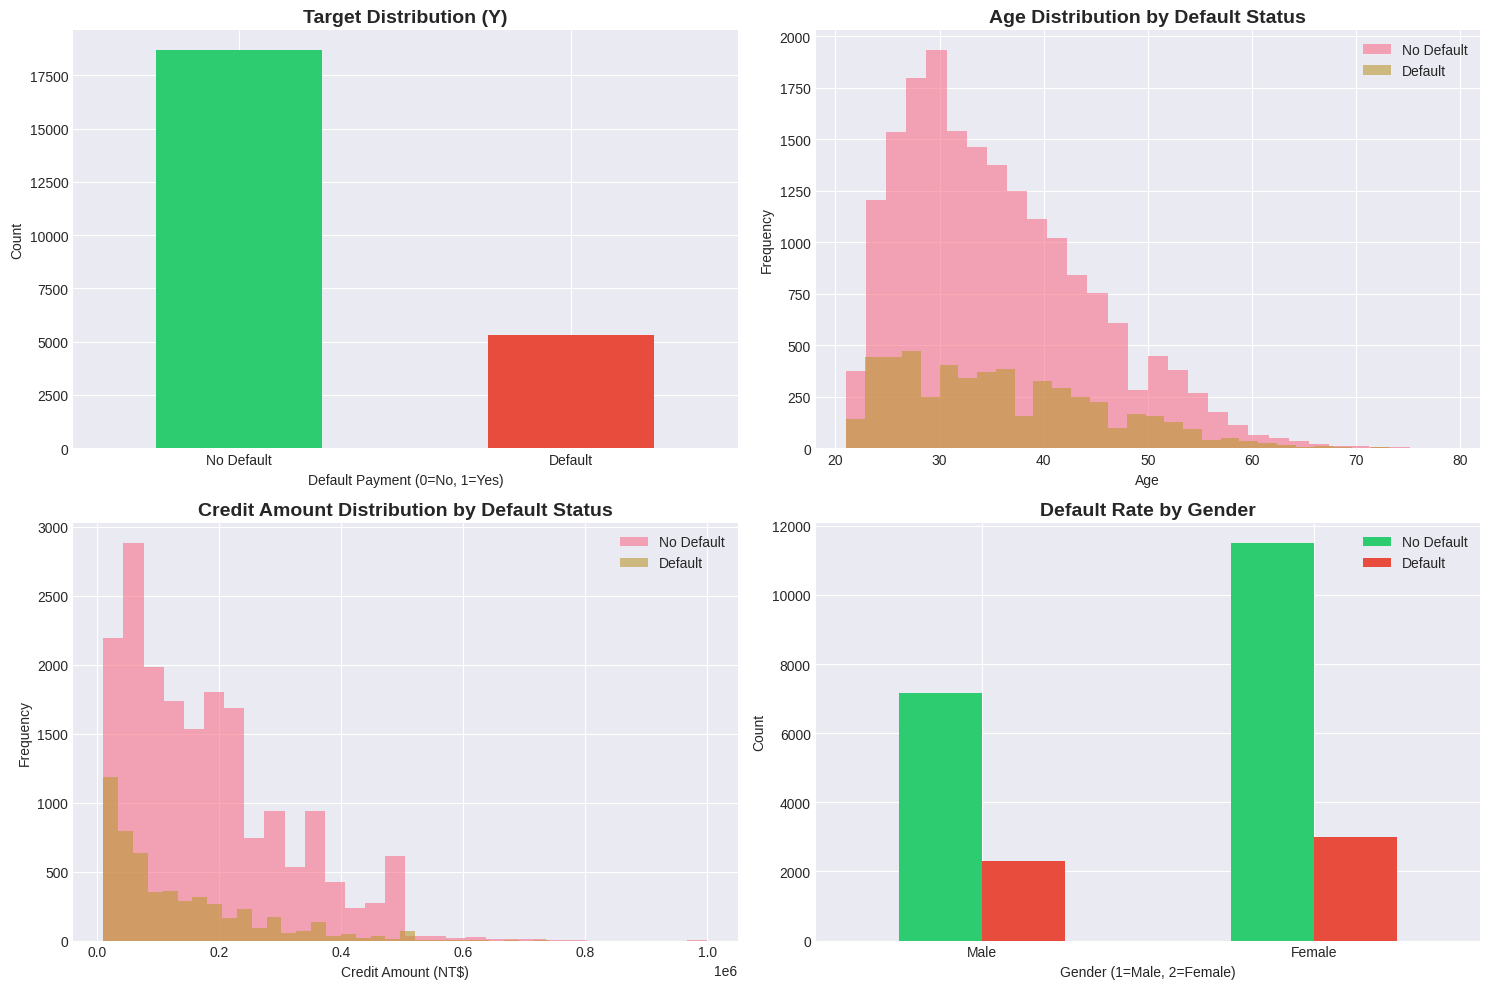

In [157]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Target distribution
train['Y'].value_counts().plot(kind='bar', ax=axes[0, 0], color=['#2ecc71', '#e74c3c'])
axes[0, 0].set_title('Target Distribution (Y)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Default Payment (0=No, 1=Yes)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xticklabels(['No Default', 'Default'], rotation=0)

# Age distribution by default status
train.groupby('Y')['X5'].plot(kind='hist', alpha=0.6, bins=30, ax=axes[0, 1], legend=True)
axes[0, 1].set_title('Age Distribution by Default Status', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Age')
axes[0, 1].legend(['No Default', 'Default'])

# Credit amount distribution
train.groupby('Y')['X1'].plot(kind='hist', alpha=0.6, bins=30, ax=axes[1, 0], legend=True)
axes[1, 0].set_title('Credit Amount Distribution by Default Status', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Credit Amount (NT$)')
axes[1, 0].legend(['No Default', 'Default'])

# Gender distribution
gender_default = train.groupby(['X2', 'Y']).size().unstack()
gender_default.plot(kind='bar', ax=axes[1, 1], color=['#2ecc71', '#e74c3c'])
axes[1, 1].set_title('Default Rate by Gender', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Gender (1=Male, 2=Female)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(['No Default', 'Default'])
axes[1, 1].set_xticklabels(['Male', 'Female'], rotation=0)

plt.tight_layout()
plt.show()


Generating correlation heatmap...


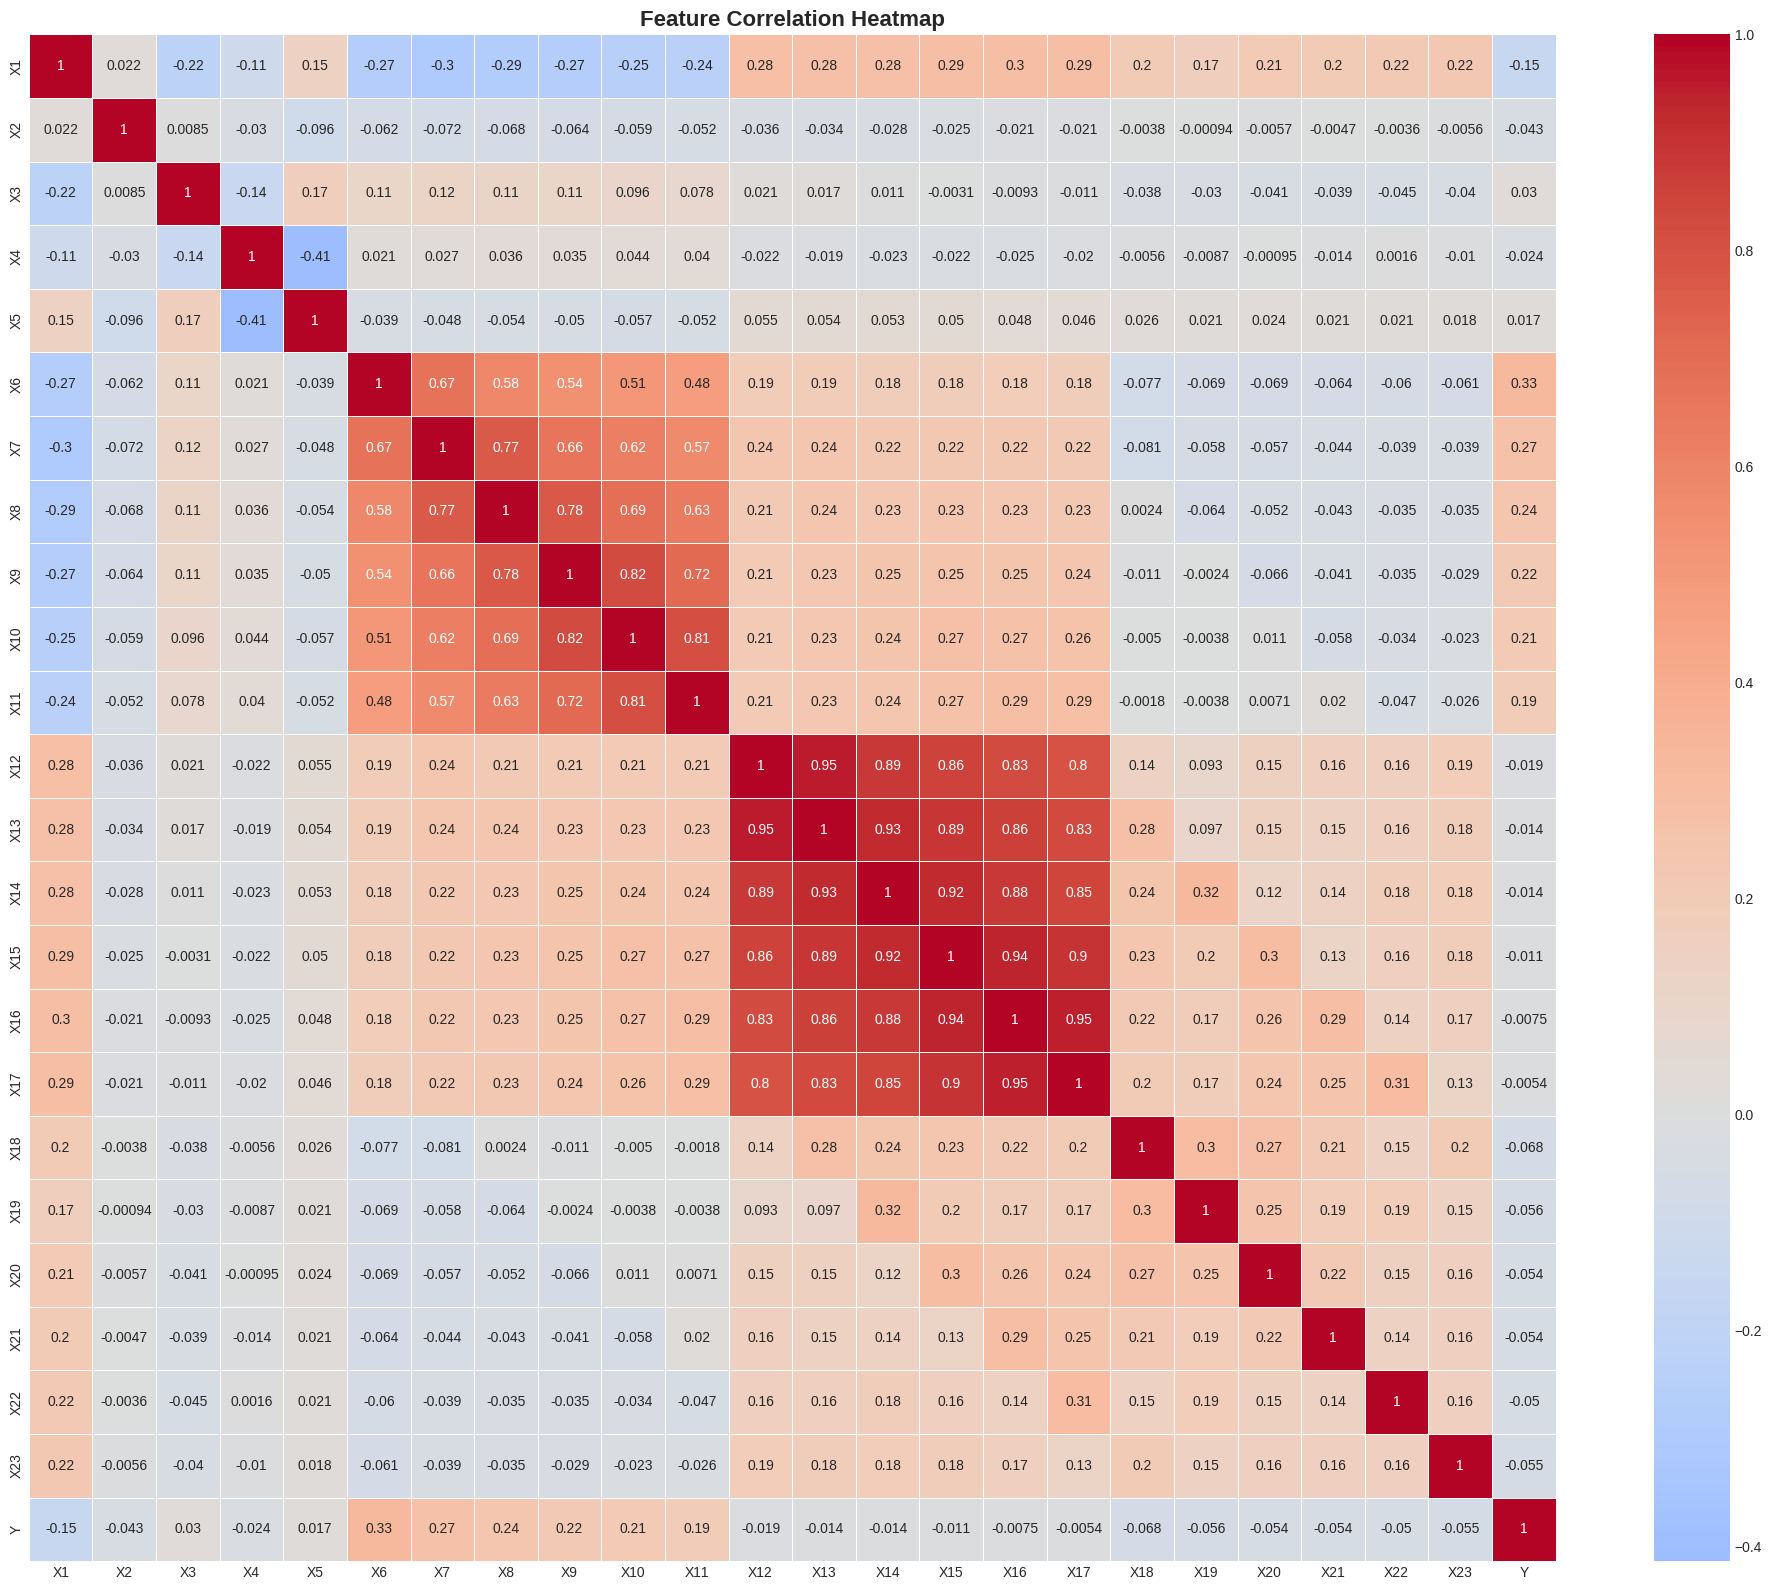

In [158]:
# Correlation heatmap
print("\nGenerating correlation heatmap...")
plt.figure(figsize=(20, 16))
correlation = train.drop('ID', axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [159]:
# Top correlations with target
print("\nTop 10 Features Correlated with Default (Y):")
target_corr = correlation['Y'].abs().sort_values(ascending=False)
print(target_corr.head(11))


Top 10 Features Correlated with Default (Y):
Y      1.000000
X6     0.325840
X7     0.266825
X8     0.238275
X9     0.220944
X10    0.205067
X11    0.188860
X1     0.154328
X18    0.067933
X19    0.056479
X23    0.054989
Name: Y, dtype: float64


In [160]:
def create_features_safe(df):
    df = df.copy()

    epsilon = 1e-10

    # 1. Payment delay features
    payment_cols = ['X6', 'X7', 'X8', 'X9', 'X10', 'X11']
    df['avg_payment_delay'] = df[payment_cols].mean(axis=1).fillna(0)
    df['max_payment_delay'] = df[payment_cols].max(axis=1).fillna(0)
    df['min_payment_delay'] = df[payment_cols].min(axis=1).fillna(0)
    df['payment_delay_trend'] = (df['X6'] - df['X11']).fillna(0)
    df['delay_count'] = (df[payment_cols] > 0).sum(axis=1)
    df['severe_delay_count'] = (df[payment_cols] >= 2).sum(axis=1)

    # 2. Bill amount features
    bill_cols = ['X12', 'X13', 'X14', 'X15', 'X16', 'X17']
    df['avg_bill_amount'] = df[bill_cols].mean(axis=1).fillna(0)
    df['max_bill_amount'] = df[bill_cols].max(axis=1).fillna(0)
    df['bill_amount_trend'] = (df['X12'] - df['X17']).fillna(0)
    df['bill_volatility'] = df[bill_cols].std(axis=1).fillna(0)

    # 3. Payment amount features
    pay_cols = ['X18', 'X19', 'X20', 'X21', 'X22', 'X23']
    df['avg_payment_amount'] = df[pay_cols].mean(axis=1).fillna(0)
    df['total_payment_amount'] = df[pay_cols].sum(axis=1).fillna(0)
    df['payment_trend'] = (df['X18'] - df['X23']).fillna(0)

    # 4. Utilization features (SAFE - prevents division by zero)
    df['credit_utilization'] = df['avg_bill_amount'] / (df['X1'] + epsilon)
    df['payment_to_bill_ratio'] = df['avg_payment_amount'] / (df['avg_bill_amount'] + epsilon)

    # Replace inf and clip extreme values
    df['credit_utilization'] = df['credit_utilization'].replace([np.inf, -np.inf], 0).fillna(0).clip(0, 10)
    df['payment_to_bill_ratio'] = df['payment_to_bill_ratio'].replace([np.inf, -np.inf], 0).fillna(0).clip(0, 10)

    # 5. Demographic features
    df['age_group'] = pd.cut(df['X5'], bins=[0, 30, 40, 50, 100],
                              labels=[0, 1, 2, 3])
    df['age_group'] = df['age_group'].astype(float).fillna(1)

    df['credit_group'] = pd.cut(df['X1'], bins=[0, 50000, 200000, 500000, 1000000],
                                 labels=[0, 1, 2, 3])
    df['credit_group'] = df['credit_group'].astype(float).fillna(1)

    # 6. Interaction features
    df['age_credit_interaction'] = df['X5'] * df['X1'] / 1000000
    df['education_credit'] = df['X3'] * df['X1'] / 100000


    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.fillna(0)

    return df

In [161]:
train_featured = create_features_safe(train)

print(f"\nOriginal features: {train.shape[1]}")
print(f"After feature engineering: {train_featured.shape[1]}")
print(f"New features created: {train_featured.shape[1] - train.shape[1]}")


Original features: 25
After feature engineering: 44
New features created: 19


In [162]:
X = train_featured.drop(['ID', 'Y'], axis=1)
y = train_featured['Y']

In [163]:
X.shape

(24000, 42)

In [164]:
y.shape

(24000,)

In [165]:
nan_count = X.isnull().sum().sum()
inf_count = np.isinf(X.select_dtypes(include=[np.number])).sum().sum()

print(f"NaN values: {nan_count}")
print(f"Infinity values: {inf_count}")

if nan_count > 0 or inf_count > 0:
    print("Found problematic values! Cleaning...")
    X = X.replace([np.inf, -np.inf], np.nan)
    X = X.fillna(0)
    print("Data cleaned!")
else:
    print("Data quality OK!")

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")


NaN values: 0
Infinity values: 0
Data quality OK!

Features shape: (24000, 42)
Target shape: (24000,)


In [166]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [167]:
print(f"\nTraining set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")

print(f"\nTraining set default rate: {y_train.mean():.2%}")
print(f"Validation set default rate: {y_val.mean():.2%}")


Training set: (19200, 42)
Validation set: (4800, 42)

Training set default rate: 22.18%
Validation set default rate: 22.19%


In [168]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [169]:
try:
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
    print(f" SMOTE successful!")
    print(f"Balanced training set: {X_train_balanced.shape}")
    print(f"Balanced default rate: {y_train_balanced.mean():.2%}")
except Exception as e:
    print(f" SMOTE failed: {e}")
    print("Using original unbalanced data...")
    X_train_balanced = X_train_scaled
    y_train_balanced = y_train


 SMOTE successful!
Balanced training set: (29884, 42)
Balanced default rate: 50.00%


In [170]:
models = {}
predictions = {}
probabilities = {}

In [171]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr.fit(X_train_balanced, y_train_balanced)
models['Logistic Regression'] = lr
predictions['Logistic Regression'] = lr.predict(X_val_scaled)
probabilities['Logistic Regression'] = lr.predict_proba(X_val_scaled)[:, 1]

In [172]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42,
                            n_jobs=-1, class_weight='balanced')
rf.fit(X_train_balanced, y_train_balanced)
models['Random Forest'] = rf
predictions['Random Forest'] = rf.predict(X_val_scaled)
probabilities['Random Forest'] = rf.predict_proba(X_val_scaled)[:, 1]

In [173]:
# XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='auc',
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1])
)
xgb_model.fit(X_train_balanced, y_train_balanced)
models['XGBoost'] = xgb_model
predictions['XGBoost'] = xgb_model.predict(X_val_scaled)
probabilities['XGBoost'] = xgb_model.predict_proba(X_val_scaled)[:, 1]

In [174]:
# Light BM
lgb_model = lgb.LGBMClassifier(
    n_estimators=200,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    class_weight='balanced',
    verbose=-1
)
lgb_model.fit(X_train_balanced, y_train_balanced)
models['LightGBM'] = lgb_model
predictions['LightGBM'] = lgb_model.predict(X_val_scaled)
probabilities['LightGBM'] = lgb_model.predict_proba(X_val_scaled)[:, 1]

In [175]:
# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=200, max_depth=7,
                               learning_rate=0.1, random_state=42)
gb.fit(X_train_balanced, y_train_balanced)
models['Gradient Boosting'] = gb
predictions['Gradient Boosting'] = gb.predict(X_val_scaled)
probabilities['Gradient Boosting'] = gb.predict_proba(X_val_scaled)[:, 1]

In [176]:
results = []

for name in models.keys():
    y_pred = predictions[name]
    y_prob = probabilities[name]

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_prob)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC-AUC': auc
    })

    print(f"\n{name}:")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  ROC-AUC:   {auc:.4f}")

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('ROC-AUC', ascending=False)


Logistic Regression:
  Accuracy:  0.7427
  Precision: 0.4428
  Recall:    0.6178
  F1-Score:  0.5159
  ROC-AUC:   0.7588

Random Forest:
  Accuracy:  0.7904
  Precision: 0.5282
  Recall:    0.5192
  F1-Score:  0.5237
  ROC-AUC:   0.7653

XGBoost:
  Accuracy:  0.7277
  Precision: 0.4222
  Recall:    0.6169
  F1-Score:  0.5013
  ROC-AUC:   0.7550

LightGBM:
  Accuracy:  0.8146
  Precision: 0.6316
  Recall:    0.3944
  F1-Score:  0.4855
  ROC-AUC:   0.7628

Gradient Boosting:
  Accuracy:  0.8104
  Precision: 0.6102
  Recall:    0.4028
  F1-Score:  0.4853
  ROC-AUC:   0.7619



MODEL COMPARISON
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
      Random Forest  0.790417   0.528176 0.519249  0.523674 0.765312
           LightGBM  0.814583   0.631579 0.394366  0.485549 0.762774
  Gradient Boosting  0.810417   0.610242 0.402817  0.485294 0.761934
Logistic Regression  0.742708   0.442799 0.617840  0.515876 0.758838
            XGBoost  0.727708   0.422237 0.616901  0.501335 0.754991


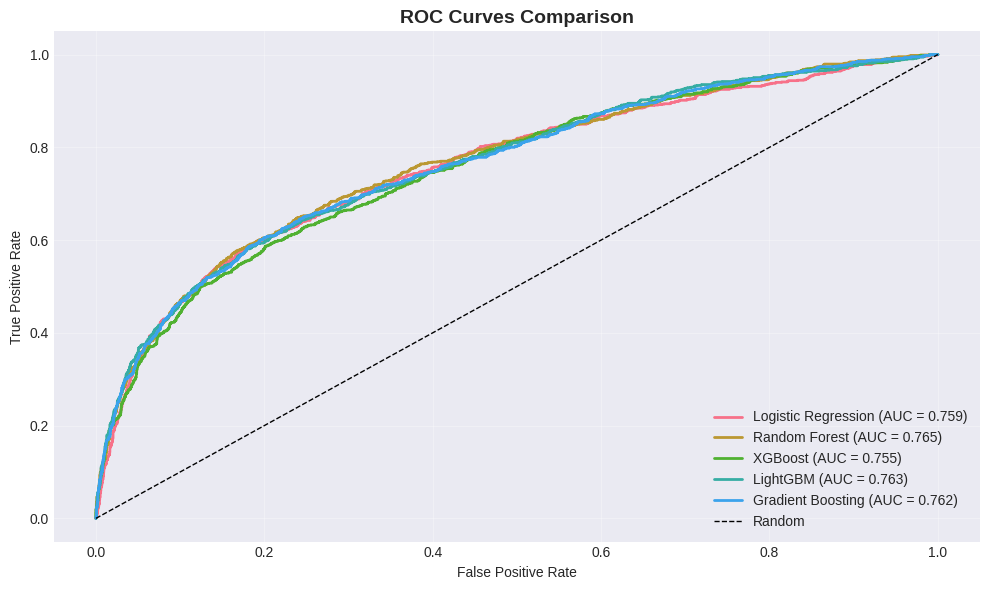

In [177]:
print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)
print(results_df.to_string(index=False))

# ROC Curves
plt.figure(figsize=(10, 6))
for name in models.keys():
    y_prob = probabilities[name]
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    auc_score = roc_auc_score(y_val, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [178]:
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"BEST MODEL: {best_model_name}")

BEST MODEL: Random Forest


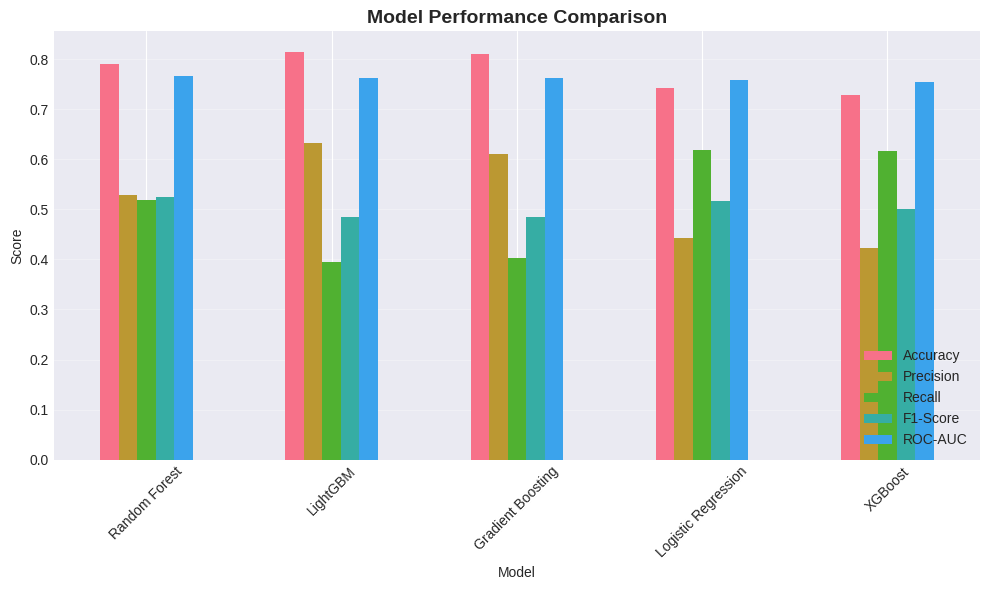

In [179]:
# Model Comparassion
fig, ax = plt.subplots(figsize=(10, 6))

results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].plot(
    kind='bar', ax=ax, rot=45
)
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_ylabel('Score')
ax.legend(loc='lower right')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


BEST MODEL: Random Forest


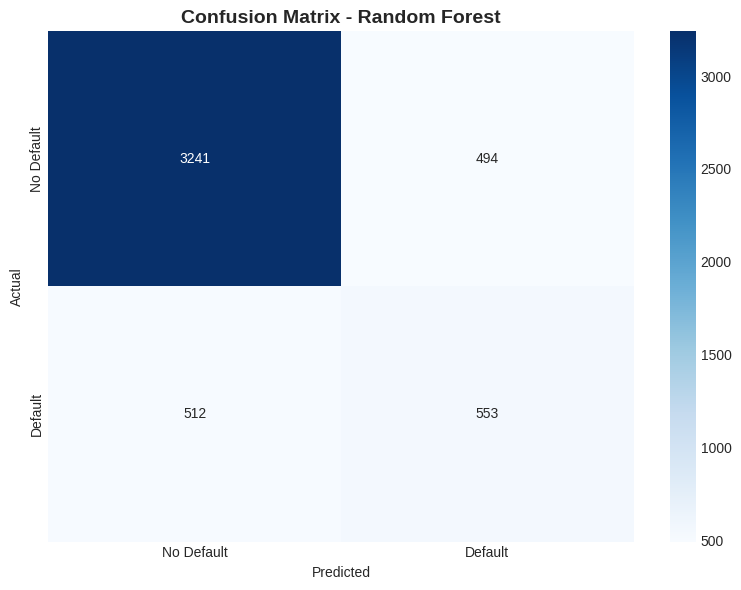

In [180]:
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\n{'='*60}")
print(f"BEST MODEL: {best_model_name}")
print(f"{'='*60}")

# Confusion Matrix for best model
cm = confusion_matrix(y_val, predictions[best_model_name])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()



Feature Importance - Random Forest:
                   Feature  Importance
28      severe_delay_count    0.057582
27             delay_count    0.055198
5                       X6    0.048449
24       max_payment_delay    0.044688
23       avg_payment_delay    0.040991
0                       X1    0.032516
36      credit_utilization    0.029002
4                       X5    0.027594
41        education_credit    0.027065
40  age_credit_interaction    0.026301
33      avg_payment_amount    0.025543
37   payment_to_bill_ratio    0.025382
7                       X8    0.024569
2                       X3    0.024166
34    total_payment_amount    0.024068
22                     X23    0.022883
30         max_bill_amount    0.022883
26     payment_delay_trend    0.022475
31       bill_amount_trend    0.022392
32         bill_volatility    0.022358


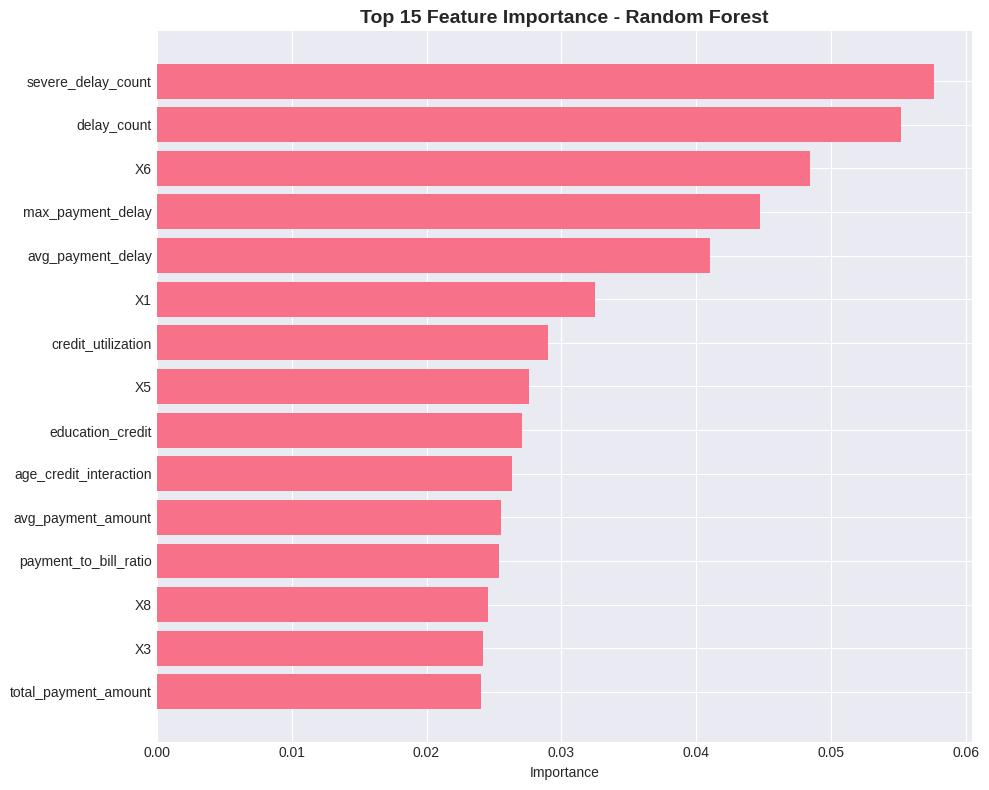

In [181]:
# Feature Importance
if best_model_name in ['Random Forest', 'XGBoost', 'LightGBM', 'Gradient Boosting']:
    print(f"\nFeature Importance - {best_model_name}:")

    importances = best_model.feature_importances_

    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    print(feature_importance_df.head(20))

    plt.figure(figsize=(10, 8))
    top_features = feature_importance_df.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importance')
    plt.title(f'Top 15 Feature Importance - {best_model_name}',
              fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [182]:
test_featured = create_features_safe(test)

In [183]:
X_test = test_featured.drop(['ID'], axis=1)

In [184]:
missing_cols = set(X.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X.columns]

In [185]:
X_test = X_test.replace([np.inf, -np.inf], np.nan)
X_test = X_test.fillna(0)

In [186]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = np.nan_to_num(X_test_scaled, 0)

In [187]:
test_predictions = best_model.predict(X_test_scaled)

In [188]:
submission = pd.DataFrame({
    'ID': test['ID'],
    'Y': test_predictions
})

In [189]:
submission.to_csv('submission.csv', index=False)
print("\n Submission file created: submission.csv")
print(submission.head(10))


 Submission file created: submission.csv
      ID  Y
0   2309  1
1  22405  0
2  23398  0
3  25059  0
4   2665  0
5   8512  0
6   5149  1
7   7791  1
8  11312  0
9  19044  0


In [190]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [191]:
print("SUBMISSION VALIDATION")
print(f"✓ Shape: {submission.shape}")
print(f"✓ Columns: {submission.columns.tolist()}")
print(f"✓ Missing values: {submission.isnull().sum().sum()}")
print(f"✓ Unique predictions: {submission['Y'].unique()}")
print(f"✓ Prediction distribution:")
print(submission['Y'].value_counts())

SUBMISSION VALIDATION
✓ Shape: (6000, 2)
✓ Columns: ['ID', 'Y']
✓ Missing values: 0
✓ Unique predictions: [1 0]
✓ Prediction distribution:
Y
0    4709
1    1291
Name: count, dtype: int64
